In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='04-Remove50', missing_type='remove', missing_percent=0.5, missing_seed=3, logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 178'

'Number of test data points: 44'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1169.222, BIC=1181.949, Fit time=0.321 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1127.622, BIC=1140.349, Fit time=0.358 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1129.530, BIC=1145.439, Fit time=0.479 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1205.485, BIC=1215.030, Fit time=0.118 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=1.217 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1129.766, BIC=1148.857, Fit time=3.181 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1136.901, BIC=1146.446, Fit time=0.260 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=1

'Train Error: 5.73942291429  Num NaN: 0'

'Test Error: 14.576791264    Num NaN: 0'

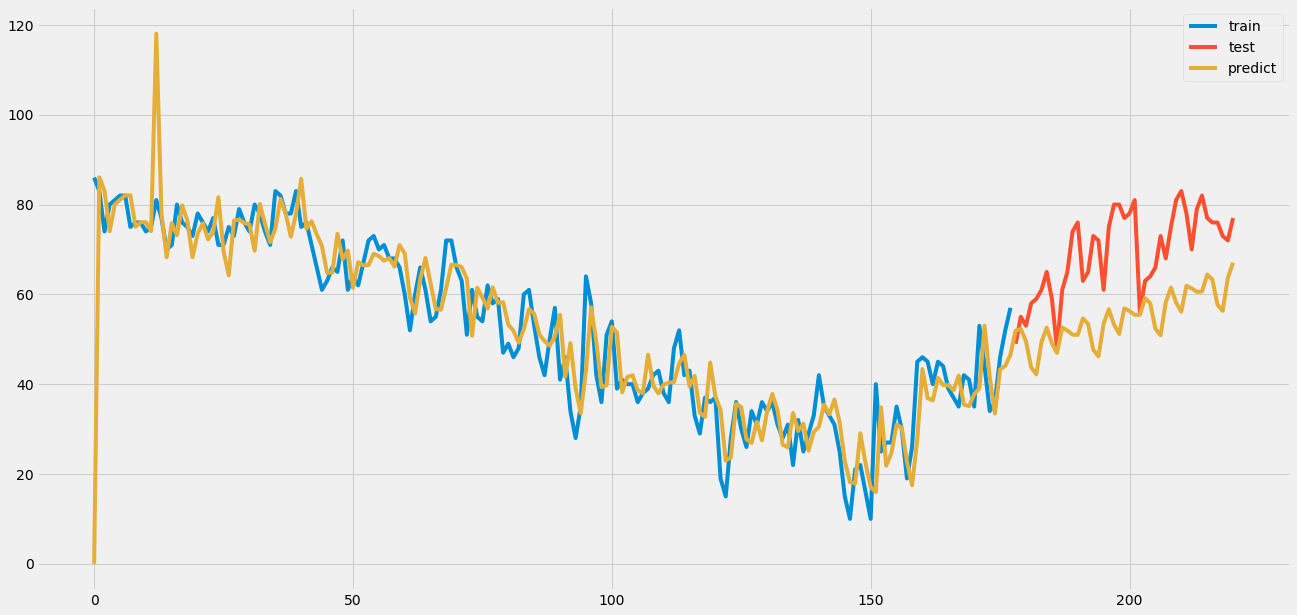

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.71797752809  Num NaN: 0'

'Test Error: 5.57209302326    Num NaN: 0'

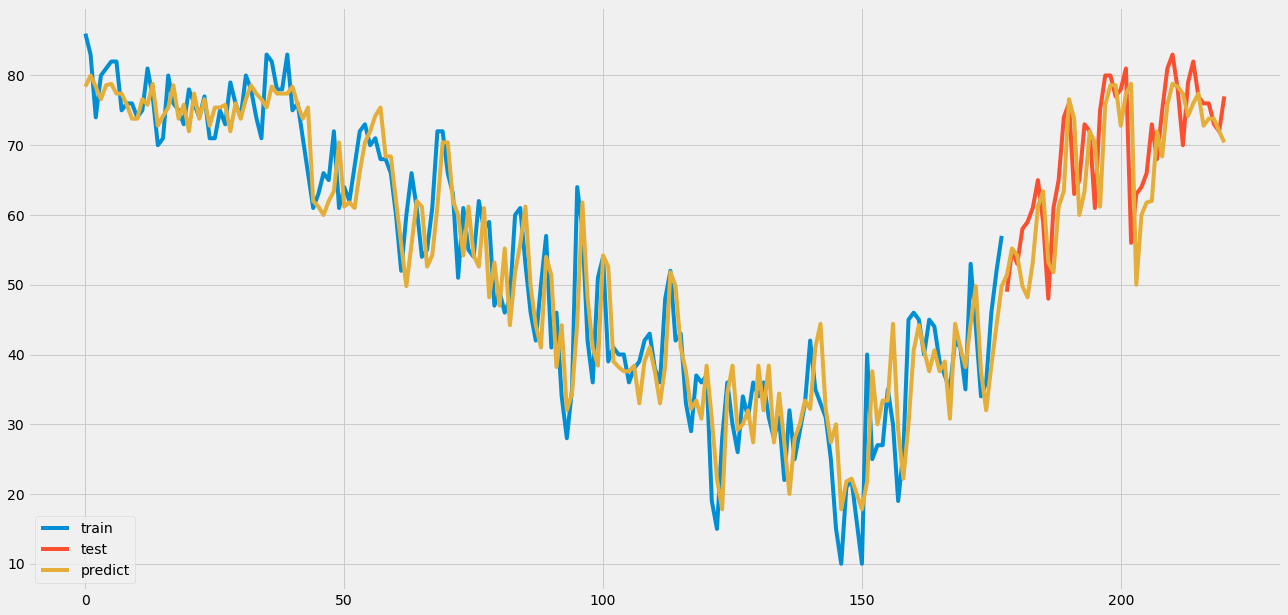

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 1.1047337085e+12  Num NaN: 0'

'Test Error: 1.45734541739e+12    Num NaN: 0'

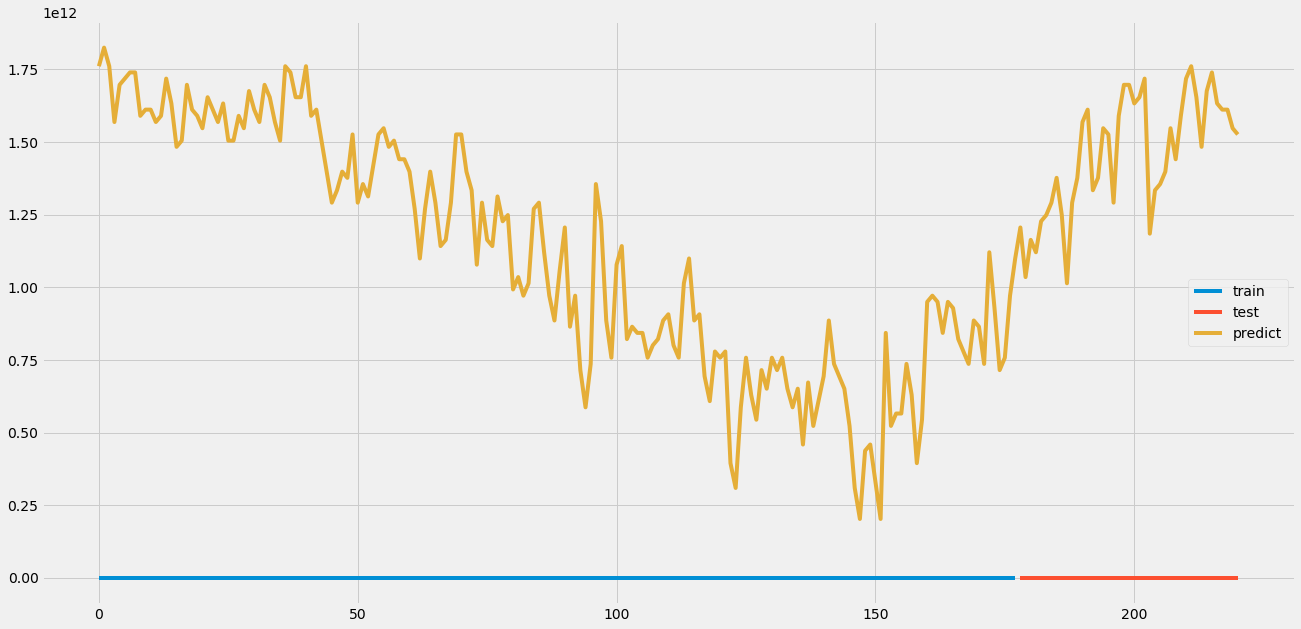

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 4.25253562916  Num NaN: 0'

'Test Error: 6.34713178295    Num NaN: 0'

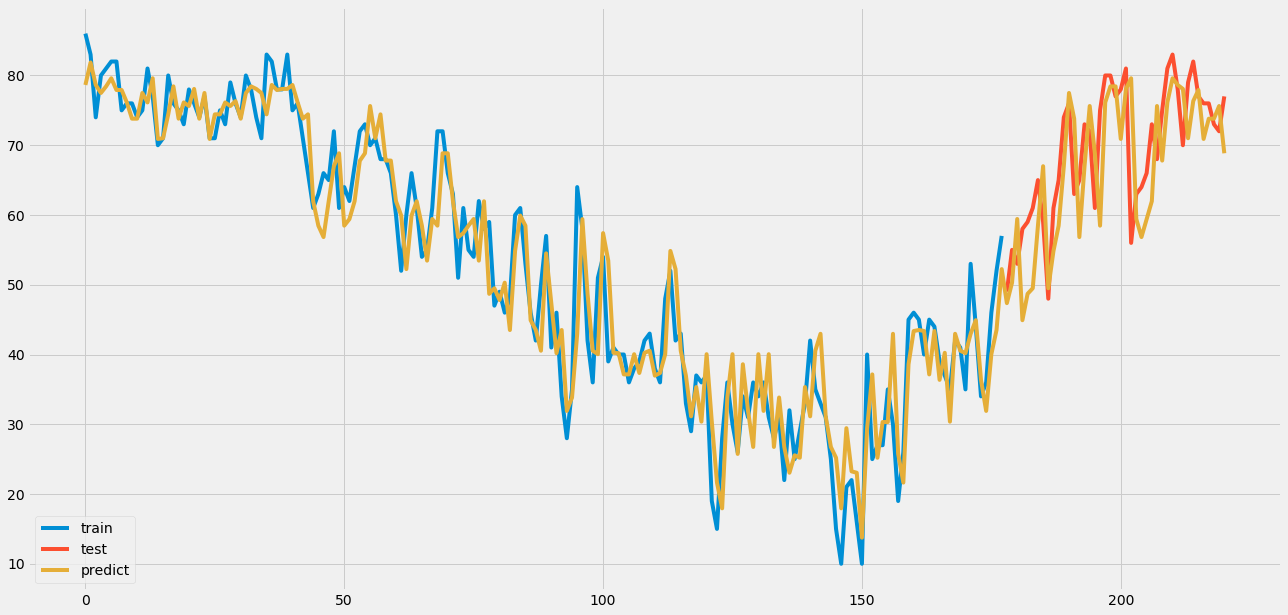

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 5.1019050047  Num NaN: 0'

'Test Error: 5.64876752514    Num NaN: 0'

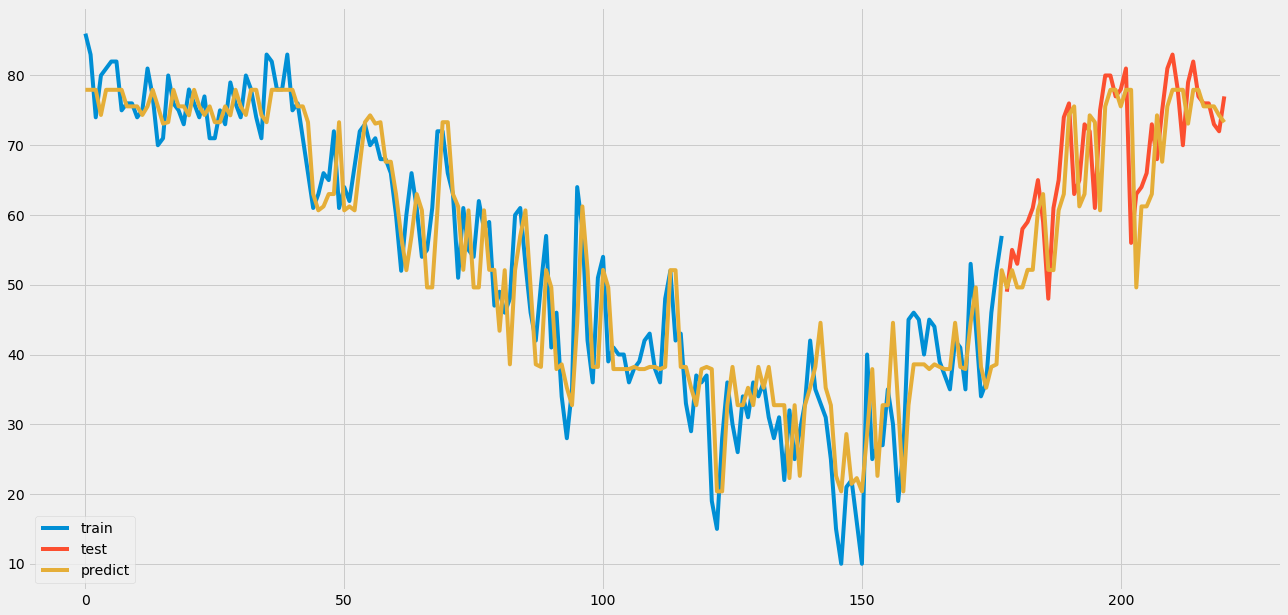

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 4.08548612087  Num NaN: 0'

'Test Error: 6.73450158363    Num NaN: 0'

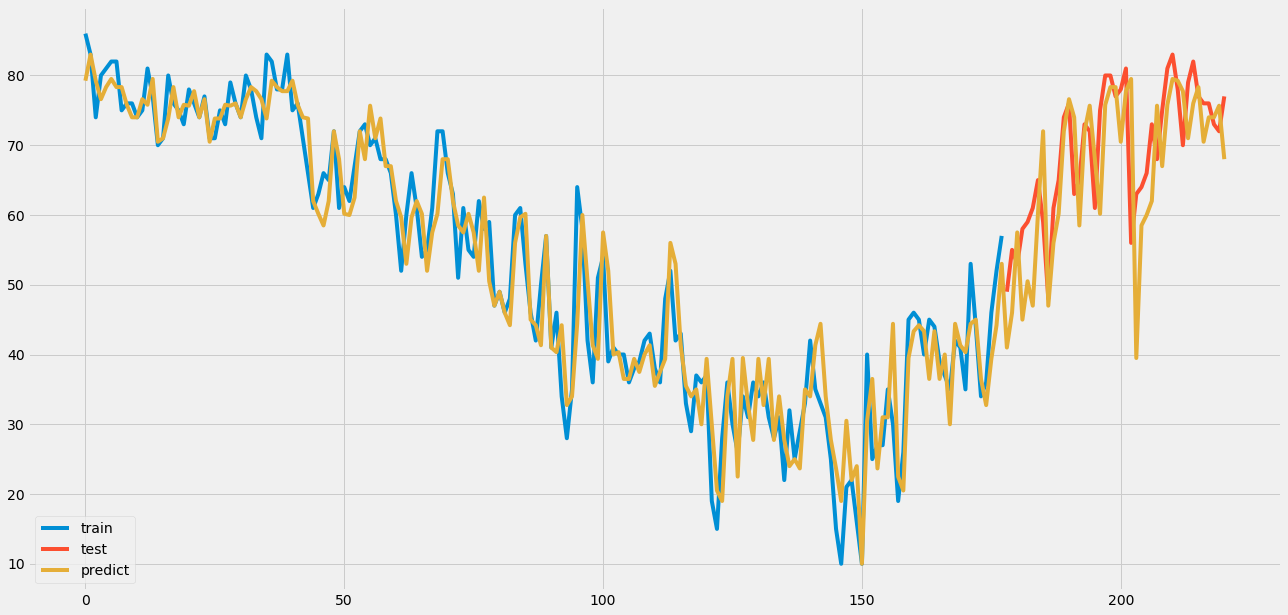

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 6.06126215725  Num NaN: 5'

'Test Error: 7.4889261395    Num NaN: 5'

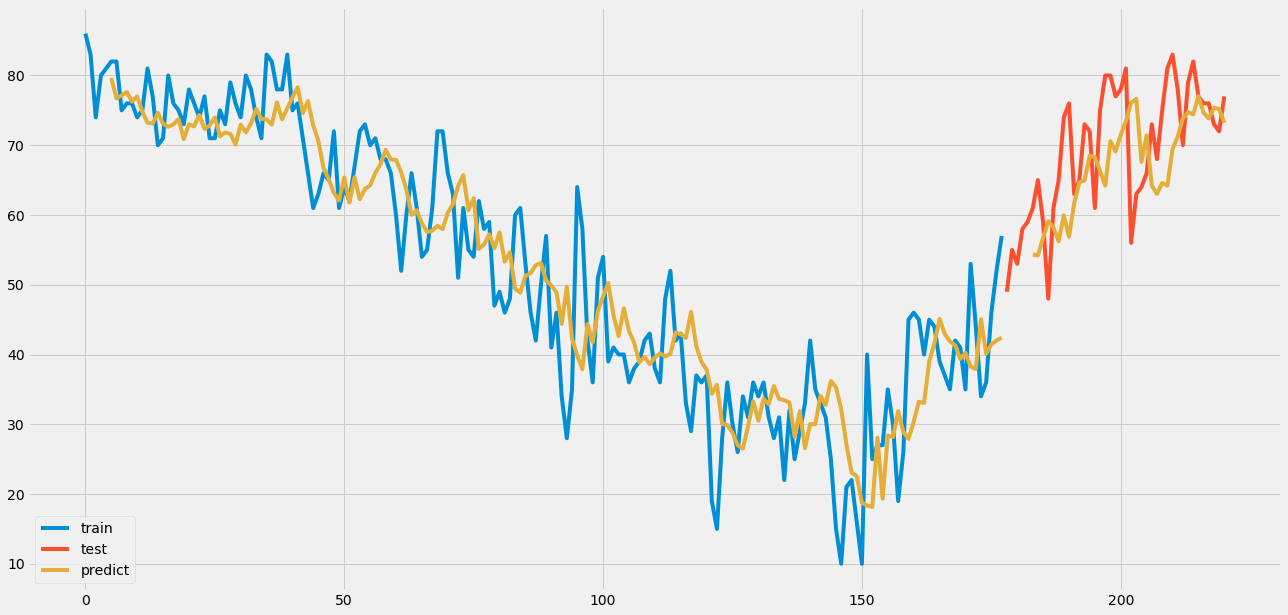

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 173 samples, validate on 38 samples
Epoch 1/10
 - 2s - loss: 1.0255 - val_loss: 0.3819
Epoch 2/10
 - 0s - loss: 0.2148 - val_loss: 0.2064
Epoch 3/10
 - 0s - loss: 0.2080 - val_loss: 0.1575
Epoch 4/10
 - 0s - loss: 0.1876 - val_loss: 0.5576
Epoch 5/10
 - 0s - loss: 0.2067 - val_loss: 0.2022
Epoch 6/10
 - 0s - loss: 0.1853 - val_loss: 0.3169
Epoch 7/10
 - 0s - loss: 0.1907 - val_loss: 0.3197
Epoch 8/10
 - 0s - loss: 0.1950 - val_loss: 0.1900
Epoch 9/10
 - 0s - loss: 0.2237 - val_loss: 0.1461
Epoch 10/10
 - 0s - loss: 0.2118 - val_loss: 0.1712


'Train Error: 15.2289784713  Num NaN: 5'

'Test Error: 12.5011849654    Num NaN: 5'

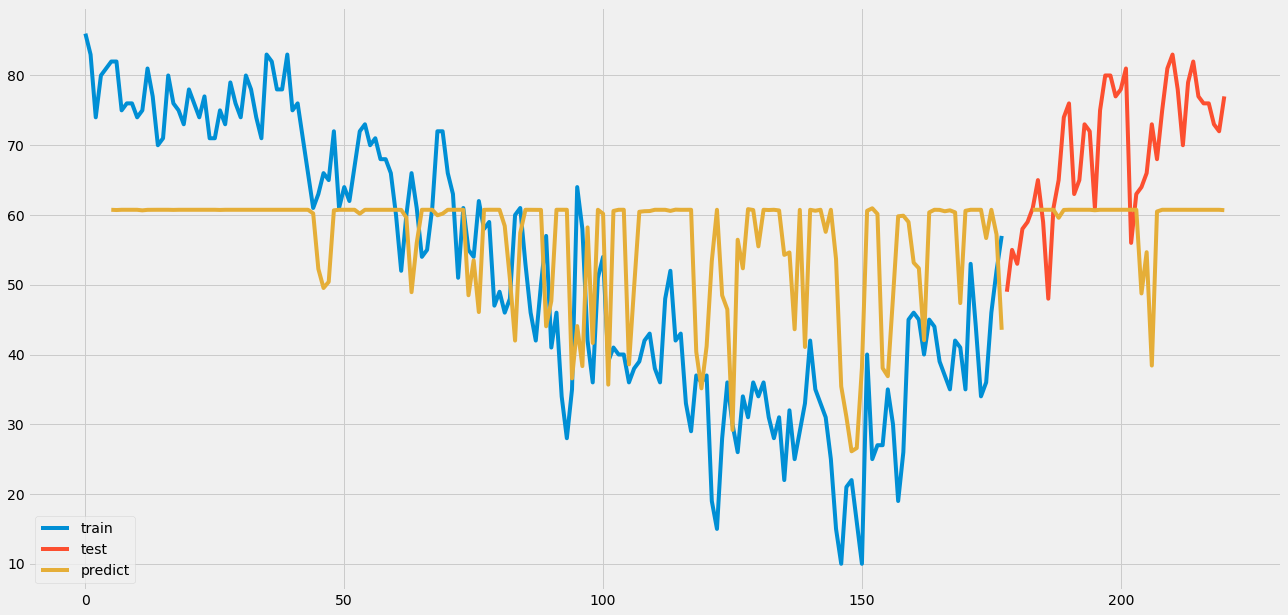

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 173 samples, validate on 38 samples
Epoch 1/10
 - 1s - loss: 0.3528 - val_loss: 0.0947
Epoch 2/10
 - 0s - loss: 0.3209 - val_loss: 0.1165
Epoch 3/10
 - 0s - loss: 0.2580 - val_loss: 0.3008
Epoch 4/10
 - 0s - loss: 0.2350 - val_loss: 0.2753
Epoch 5/10
 - 0s - loss: 0.2740 - val_loss: 0.3149
Epoch 6/10
 - 0s - loss: 0.2360 - val_loss: 0.2921
Epoch 7/10
 - 0s - loss: 0.2494 - val_loss: 0.6078
Epoch 8/10
 - 0s - loss: 0.2466 - val_loss: 0.3717
Epoch 9/10
 - 0s - loss: 0.2315 - val_loss: 0.3720
Epoch 10/10
 - 0s - loss: 0.2336 - val_loss: 0.1491


'Train Error: 18.1122637181  Num NaN: 5'

'Test Error: 10.8818459762    Num NaN: 5'

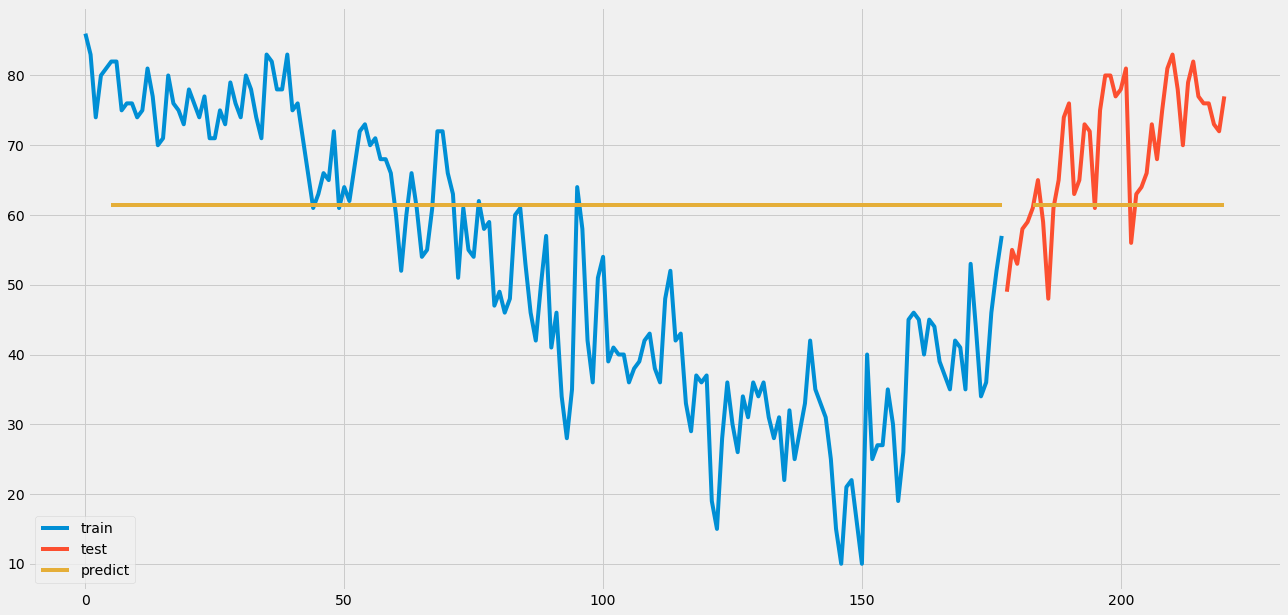

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

Train on 36 samples, validate on 9 samples
Epoch 1/10
 - 1s - loss: 0.9373 - val_loss: 0.8449
Epoch 2/10
 - 0s - loss: 0.7931 - val_loss: 0.7399
Epoch 3/10
 - 0s - loss: 0.6945 - val_loss: 0.6479
Epoch 4/10
 - 0s - loss: 0.6003 - val_loss: 0.5552
Epoch 5/10
 - 0s - loss: 0.5027 - val_loss: 0.4608
Epoch 6/10
 - 0s - loss: 0.4134 - val_loss: 0.3744
Epoch 7/10
 - 0s - loss: 0.3391 - val_loss: 0.3048
Epoch 8/10
 - 0s - loss: 0.2815 - val_loss: 0.2501
Epoch 9/10
 - 0s - loss: 0.2354 - val_loss: 0.2099
Epoch 10/10
 - 0s - loss: 0.1996 - val_loss: 0.1797


IndexError: index 1 is out of bounds for axis 2 with size 1

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')